<h1 align="center"> Simple Linear Regression (SLR) from Scratch</h1>

<h1 align="center"> <a href="https://github.com/alireza365/" target="_blank" rel="noopener noreferrer">Alireza Bagheri</a></h1>

<h1>Table of contents</h1>
<ul>
    <li><a href="#Problem_setup">Problem Setup</a></li>   
    <li><a href="#Data">Data Example</a> </li>  
    <li><a href="#Analytical_solution">SLR with Analytical Solution</a></li>
    <li><a href="#Gradient_descent">SLR with Gradient Descent</a></li>
    <li><a href="#Scikit_learn">SLR with Scikit-Learn</a></li>
</ul> 

# Problem setup  <a name="Problem_setup"></a>

Consider the linear model function for $i = 1, ..., n$

\begin{equation*}
y_i = ax_i + b + e_i,
\end{equation*}

where $y_i$ and $x_i$ are dependent and independent random variables, respectively, and $e_i$ deones an error term. The parameters $a$ and $b$ represent slope and intercept of the linear model, respectively. The goal of Simple Linear Regression (SLR) is to specity the linear relationship between two variables $x$ and $y$.

# Data Example <a name="Data"></a>

Let us generate data $y$ with $n$ samples as

\begin{equation*}
y = 3x - 2 + noise,
\end{equation*}

where $x$ is the independent variable with uniform distribution in the range of [-5,5], while $noise$ has a Guassian (Normal) distribution with mean 0 and standard deviation 2.

In [1]:
import numpy as np; np.random.seed(123)

n = 100              # Number of data samples
x = np.random.uniform(-5.0, 5.0, n)


mu, sigma = 0, 2     # Mean and standard deviation
noise = np.random.normal(mu, sigma, n)

y = 3*x - 2 + noise  # Data y

As a next setp, let us have a look at our synthetic data:

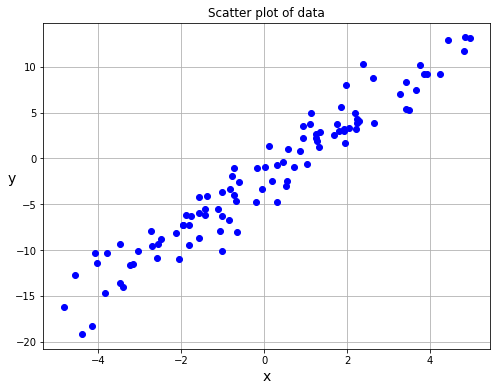

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(x, y, 'ob')
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.xlabel('x', fontsize = 14)
plt.title('Scatter plot of data')
plt.grid()
plt.show()

# SLR with Analytical Solution <a name="Analytical_solution"></a>

In order to predict value of $y$ for a given $x$, we find the best-fit line $\hat{y} = ax + b$ such that the Mean Squared Error (MSE) in $y$ is minimized. This optimization problem having a set of $n$ points $\left( {{x_i},{y_i}} \right)$ can be written as

\begin{equation*}
\underset{a,b}{\text{minimize}} \quad { J\left( {a,b} \right) },
\end{equation*}


where the cost function $J$ is computed as
\begin{equation*}
J\left( {a,b} \right) = \frac{1}{n}\sum\limits_{i = 1}^n {{{\left( {{y_i} - \left( {a{x_i} + b} \right)} \right)}^2}}.
\end{equation*}

The cost function $J$ will be minimized at the values of $a$ and $b$ for which $\frac{{dJ}}{{da}} = 0$ and $\frac{{dJ}}{{db}} = 0$. Accordingly, $a$ and $b$ can be readily calculated as

\begin{equation*}
a = \frac{{{\mathop{\rm cov}} \left( {{\bf{x}},{\bf{y}}} \right)}}{{{\mathop{\rm var}} \left( {\bf{x}} \right)}},
\end{equation*}

\begin{equation*}
b = {\mu _y} - a{\mu _x},
\end{equation*}

where ${\mu _x}$ and ${\mu _y}$ are the average of $x$ and $y$, respectively, e.g., ${\mu _x}$ can be calculated as

\begin{equation*}
{\mu _x} = \frac{1}{n}\sum\limits_{i = 1}^n {{x_i}},
\end{equation*}

${\mathop{\rm var}} \left( {\bf{x}} \right)$ represents the variance of $x$:


\begin{equation*}
{\mathop{\rm var}} \left( {\bf{x}} \right) = \frac{1}{n}\sum\limits_{i = 1}^n {{{\left( {{x_i} - {\mu _x}} \right)}^2}},
\end{equation*}

and ${\mathop{\rm cov}} \left( {{\bf{x}},{\bf{y}}} \right)$ represents the sample covariance between $x$ and $y$:

\begin{equation*}
{\mathop{\rm cov}} \left( {{\bf{x}},{\bf{y}}} \right) = \frac{1}{n}\sum\limits_{i = 1}^n {\left( {{x_i} - {\mu _x}} \right)\left( {{y_i} - {\mu _y}} \right)} .
\end{equation*}

coefficient: 2.9461907026817054 , intercept: -1.9291515857079722


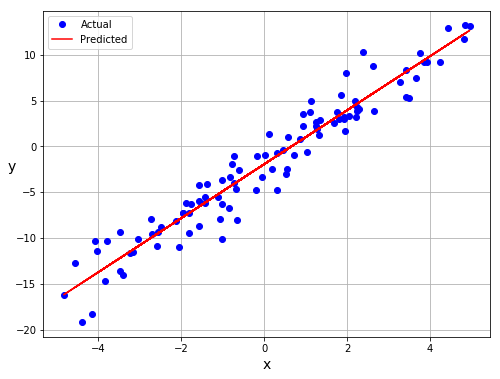

In [3]:
def mean(x): # np.mean(x)   
    return sum(x)/len(x)  

def variance(x): # np.var(x)  
    return sum((i - mean(x))**2 for i in x)/len(x) 

def covariance(x, y): # np.cov(x, y, rowvar=False, bias=True)[0][1]
    return sum((i - mean(x))*(j - mean(y)) for i, j in zip(x, y))/len(x) 


a = covariance(x,y)/variance(x)
b = mean(y) - a*mean(x)

# Print the coefficients
print('coefficient:', a, ', intercept:', b)

# Plot data and the the fitted line
y_pred = a * x + b

plt.figure(figsize=(8,6))
plt.plot(x, y, 'ob', label = "Actual")
plt.plot(x, y_pred, 'r', label = "Predicted")
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.xlabel('x', fontsize = 14)
plt.legend(loc='upper left')
plt.grid()
plt.show()

# SLR with Gradient Descent <a name="Gradient_descent"></a>

Gradient descent is a first-order optimization algorithm for finding the local or global minima of a fuction. Given the cost function $J$ with parameters $a$ and $b$, the gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values $a$ and $b$ that minimize $J$. In general, we can define the process of gradient descent as


\begin{equation*}
a \leftarrow a + \eta \frac{{dJ}}{{da}}
\end{equation*}

\begin{equation*}
b \leftarrow b + \eta \frac{{dJ}}{{db}}
\end{equation*}

where 

\begin{equation*}
\frac{{dJ}}{{da}} =  - \frac{2}{n}\sum\limits_{i = 1}^n {{x_i}\left( {{y_i} - \left( {a{x_i} + b} \right)} \right)},
\end{equation*}

and 

\begin{equation*}
\frac{{dJ}}{{db}} =  - \frac{2}{n}\sum\limits_{i = 1}^n {\left( {{y_i} - \left( {a{x_i} + b} \right)} \right)},
\end{equation*}

are the gradients with respect to parameters $a$ and $b$, respectively, and $\eta$ is the step size of gradient descent.

In [4]:
class Simple_Linear_Regression:
    # ----------------------------------------------------------
    def __init__(self, lr = 0.1, itr = 20):
                            # Initialization
        self.lr = lr        # Learning rate
        self.itr = itr      # Number of iterations (epochs)
        self.a = -8         # Coefficient (Slope)
        self.b = -8         # Intercept
    # ----------------------------------------------------------       
    def predict(self, X = [], flag = False):
        if flag==False:
            self.y_pred = self.a*self.x + self.b
        else:
            self.y_pred = self.a*X + self.b
        return self.y_pred
    # ----------------------------------------------------------        
    def cost_func(self):
        self.cost = sum((self.y - self.y_pred)**2)/len(self.y)
        return self.cost
    # ----------------------------------------------------------
    def gradient_descent(self):
        self.da, self.db = 0, 0
        for x_, y_ in zip(self.x, self.y):
            e = y_ - (self.a*x_ + self.b)
            self.da += -2/len(self.x)*x_*e
            self.db += -2/len(self.x)*e
    # ----------------------------------------------------------
    def update_params(self): 
        self.a = self.a - self.lr * self.da
        self.b = self.b - self.lr * self.db
        return self.a, self.b
    # ----------------------------------------------------------
    def fit(self, x, y):     
        self.x = x
        self.y = y
        
        costs = []
        params = []
        
        while(self.itr+1):
            self.predict()
            self.cost_func()
            costs.append(self.cost)
            
            self.gradient_descent()
            params.append([self.a, self.b])
            self.update_params()
            self.itr -= 1
        return costs, params
    # ---------------------------------------------------------
    def R2_Score(self, x, y):
        ss_res = sum((self.predict(x, flag = True) - y)**2)
        ss_tot = sum((y - np.mean(y))**2)
        r2 = 1 - ss_res/ss_tot
        return r2 

In [ ]:
lr = 0.1   # Learning rate
n_itr = 20 # Number of iterations (epochs)

obj = Simple_Linear_Regression(lr, n_itr)
J, params = obj.fit(x, y)

print('Coefficient:', obj.a, ', Intercept:', obj.b)
print('r2 score:', obj.R2_Score(x, y))

Coefficient: 2.946349251613749 , Intercept: -1.9848694297320832
r2 score: 0.9316889256179585


Let us plot the cost function $J$ versus training iterations, as well as scatter plot of the data and the regression line:

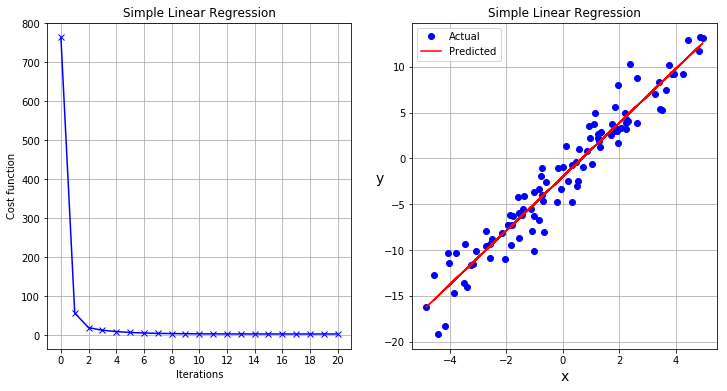

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(len(J)), J,  '-xb')
plt.title('Simple Linear Regression')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.xticks(range(0,n_itr+1,2))
plt.grid()


y_pred = obj.a* x + obj.b
#y_pred = obj.predict(x, True)

plt.subplot(1,2,2)
plt.plot(x, y, 'ob', label = "Actual")
plt.plot(x, y_pred, 'r', label = "Predicted")
plt.ylabel('y', fontsize= 14, rotation=0)
plt.xlabel('x', fontsize= 14)
plt.legend(loc='best')
plt.title('Simple Linear Regression')
plt.grid()
plt.show()

In the following, we sketch contour and surface plots in order to have better understanding of the gradient descent approach.

In [ ]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

def my_cost_func(x, y, a, b):
    y_pred = a*x + b
    return sum((y - y_pred)**2)/len(y)

A, B = np.meshgrid(np.linspace(-10, 10,100),np.linspace(-10,10,100))

# Computing the cost function for each params combination
Z = np.array([my_cost_func(x, y, a, b) 
              for a, b in zip(np.ravel(A), np.ravel(B)) ])
Z = Z.reshape(A.shape)

a_, b_ = zip(*params)



fig, ax = plt.subplots(figsize = (7,7))
ax.contour(A, B, Z, 30, cmap = 'jet')
ax.set_title('Contour Plot for Simple Linear Regression')
ax.set_xlabel('a', fontsize = 14)
ax.set_ylabel('b', fontsize= 14)

# Create animation
line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
ax.legend(loc = 'upper right')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(a_[:i], b_[:i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a_), interval=200, 
                               repeat_delay=60, blit=True)


plt.close()

In [ ]:
HTML(anim.to_jshtml())
#anim.save('SLR_contour_plot.gif')

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(A, B, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.set_xlabel('a', fontsize = 14)
ax.set_ylabel('b', fontsize= 14)
ax.set_zlabel('Cost function', fontsize= 14)
#ax.legend(loc='center right')
ax.set_title('Surface Plot for Simple Linear Regression')
ax.view_init(45, 45)

# Create animation
line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
ax.legend(loc = 1)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line, 

def animate(i):
    line.set_data(a_[:i], b_[:i])
    line.set_3d_properties(J[:i])
    return line, 

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a_), interval=150, 
                               repeat_delay=60, blit=True)
plt.close()

In [ ]:
HTML(anim.to_jshtml())
#anim.save('SLR_surface_plot.gif')

# SLR with Scikit-Learn <a name="Scikit_learn"></a>

In this section, we do regression through Scikit-Learn package as the following.

In [ ]:
from sklearn.linear_model import LinearRegression

# Model Intialization
reg = LinearRegression()

# Data Fitting
x = x.reshape(-1, 1)
reg = reg.fit(x, y)

# Y Prediction
#Y_pred = reg.predict(x)

print('Coefficient:', reg.coef_, ', Intercept:', reg.intercept_)
print('r2 score:', reg.score(x, y))

Coefficient: [2.9461907] , Intercept: -1.9291515857079728
r2 score: 0.9317442693000979


In [ ]:
from datetime import datetime as dt
print("Completed running this Notebook at:", dt.now())

Completed running this Notebook at: 2019-07-10 23:02:17.161276


In [ ]:
# Clean up!
import os, signal; os.kill(os.getpid(), signal.SIGILL)